# Heart Desease Detection

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [40]:
df=pd.read_csv("heart.csv")
df.shape

(303, 14)

In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [44]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [45]:
# Create X (all the feature columns)
X = df.drop("target", axis=1)

# Create y (the target column)
y = df["target"]

In [46]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [47]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [48]:
y.head(), y.value_counts()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64,
 1    165
 0    138
 Name: target, dtype: int64)

In [49]:
discrete_df=df[["cp","sex","restecg","exang","slope","ca","thal","target"]]


In [50]:
discrete_df.shape

(303, 8)

In [51]:
continuous_df=df[["age","trestbps","chol","fbs","thalach","oldpeak"]]

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

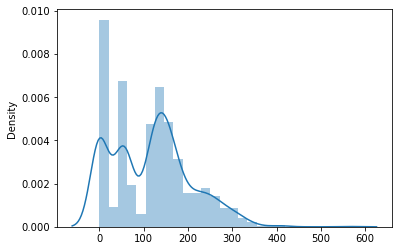

In [52]:
sns.distplot(continuous_df[['age','trestbps','chol','fbs','thalach']])

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>],
       [<AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'oldpeak'}>]], dtype=object)

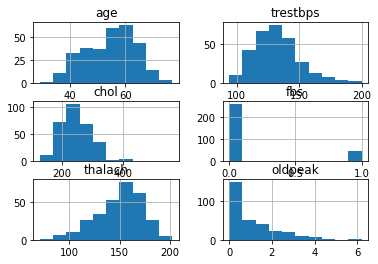

In [53]:
continuous_df.hist()

In [54]:
continuous_df.head()

,age,trestbps,chol,fbs,thalach,oldpeak
0,63,145,233,1,150,2.3
1,37,130,250,0,187,3.5
2,41,130,204,0,172,1.4
3,56,120,236,0,178,0.8
4,57,120,354,0,163,0.6


In [55]:

continuous_df.shape

(303, 6)

<AxesSubplot:>

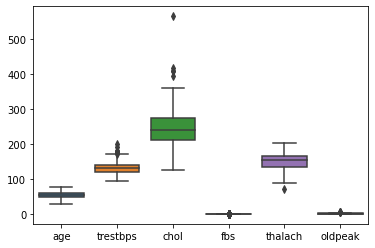

In [56]:
sns.boxplot(data=continuous_df)


In [57]:
continuous_iqr=continuous_df
Q1 = continuous_iqr.quantile(0.25)
Q3 = continuous_iqr.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age         13.5
trestbps    20.0
chol        63.5
fbs          0.0
thalach     32.5
oldpeak      1.6
dtype: float64


In [58]:
continuous_df.shape

(303, 6)

In [59]:
continuous_iqr_clean=continuous_iqr[~((continuous_iqr < (Q1 - 1.5 * IQR)) | (continuous_iqr > (Q3 + 1.5 * IQR))).any(axis=1)]

In [60]:
continuous_iqr_clean.shape

(244, 6)

In [61]:
oldpeak_ranges = ["[{0} - {1})".format(oldpeak, oldpeak + 1) for oldpeak in range(4, 8, 1)]
oldpeak_ranges

['[4 - 5)', '[5 - 6)', '[6 - 7)', '[7 - 8)']

In [62]:
count_oldpeak_ranges = len(oldpeak_ranges)
count_oldpeak_ranges

4

In [63]:
df['oldpeak_ranges'] = pd.cut(x=df['oldpeak'], bins=count_oldpeak_ranges, labels=oldpeak_ranges)

In [84]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,oldpeak_ranges
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,[5 - 6)
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,[6 - 7)
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,[4 - 5)
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,[4 - 5)
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,[4 - 5)


In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 14), (76, 14), (227,), (76,))

In [118]:
y=df['target']

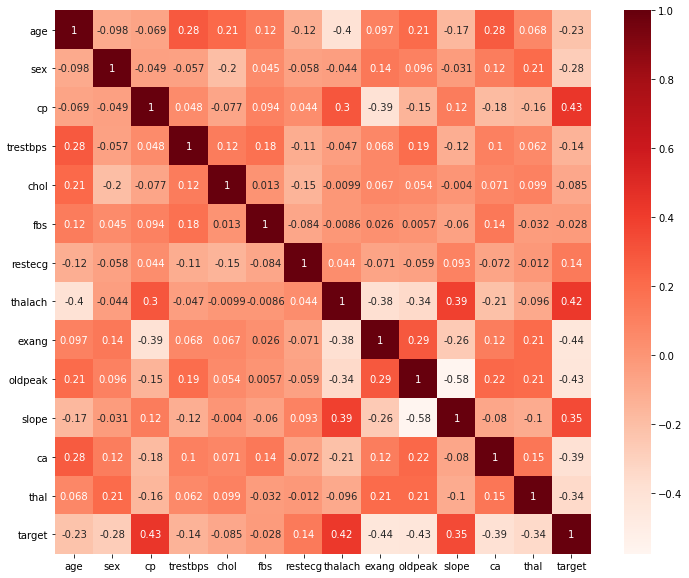

In [119]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [120]:
cor_target = abs(cor["target"])
cor_target 

age         0.225439
sex         0.280937
cp          0.433798
trestbps    0.144931
chol        0.085239
fbs         0.028046
restecg     0.137230
thalach     0.421741
exang       0.436757
oldpeak     0.430696
slope       0.345877
ca          0.391724
thal        0.344029
target      1.000000
Name: target, dtype: float64

In [121]:
relevant_features = cor_target[cor_target>0.5]
relevant_features

target    1.0
Name: target, dtype: float64

There is no correlation in this method, therefore can not be used.

Backward Elimibnation

In [122]:
import statsmodels.api as sm
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const       4.986501e-03
age         7.611292e-01
sex         4.244938e-05
cp          8.401461e-07
trestbps    1.144073e-01
chol        4.025451e-01
fbs         7.711245e-01
restecg     2.128192e-01
thalach     7.988188e-03
exang       5.386779e-03
oldpeak     1.084749e-02
slope       6.345322e-02
ca          6.248649e-06
thal        9.523132e-04
dtype: float64

In [123]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']


# Part2

In [93]:
#df.drop(['oldpeak_ranges'], axis=1)

In [97]:
df=pd.read_csv("heart.csv")
df.shape

(303, 14)

In [98]:
#seeing balance
y.head(), y.value_counts()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64,
 1    165
 0    138
 Name: target, dtype: int64)

it is balanced since they differ by 27 which is within the right range

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 14), (76, 14), (227,), (76,))

model selection

In [100]:
# Import the Ridge model class from the linear_model module
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = df.drop("target", axis=1)
y = df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.5351464847153694

In [101]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)



# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.5106393318965518

In [102]:
# Import LinearSVC from the svm module
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)



# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = LinearSVC(max_iter=1000)
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [103]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)



# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

In [125]:
# Using cross_val_score()
cross_val_score(clf, X, y)

array([0.81967213, 0.8852459 , 0.80327869, 0.8       , 0.76666667])

In [126]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take mean of 5-fold cross-validation
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

clf_single_score, clf_cross_val_score

(0.8688524590163934, 0.8248087431693989)

In [127]:
cross_val_score(clf, X, y, cv=5, scoring=None) # default scoring

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

In [128]:
# Accuracy as percentage
print(f"Heart Disease Classifier Accuracy: {clf.score(X_test, y_test) * 100:.2f}%")

Heart Disease Classifier Accuracy: 86.89%


In [129]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.10344828, 0.13793103, 0.13793103,
       0.17241379, 0.17241379, 0.24137931, 0.4137931 , 0.48275862,
       0.51724138, 0.72413793, 0.82758621, 0.93103448, 1.        ])

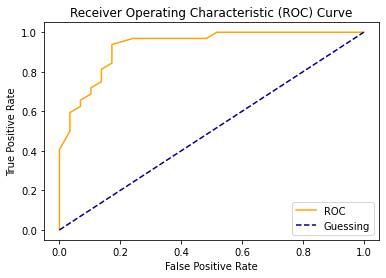

In [130]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [131]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs)

0.929956896551724

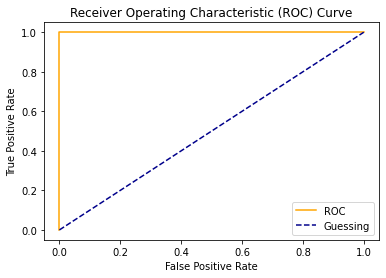

In [132]:
# Plot perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [133]:
# Perfect ROC AUC score
roc_auc_score(y_test, y_test)

1.0

In [105]:
# We'll leave the hyperparameters as default to begin with...
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [106]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [107]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [108]:
# Use the model to make a prediction on the test data (further evaluation)
y_preds = clf.predict(X_test)

In [109]:
# Evaluate the model on the training set
clf.score(X_train, y_train)

1.0

In [110]:
# Evaluate the model on the test set
clf.score(X_test, y_test)

0.8688524590163934

In [111]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [112]:
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[24,  5],
       [ 3, 29]], dtype=int64)

In [113]:
accuracy_score(y_test, y_preds)

0.8688524590163934

In [114]:
clf.predict_proba(X_test[:5])

array([[0.87, 0.13],
       [0.4 , 0.6 ],
       [0.4 , 0.6 ],
       [0.92, 0.08],
       [0.21, 0.79]])

In [115]:
# Try different numbers of estimators (trees)... (no cross-validation)
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100}%")

Trying model with 10 estimators...
Model accuracy on test set: 85.24590163934425%
Trying model with 20 estimators...
Model accuracy on test set: 80.32786885245902%
Trying model with 30 estimators...
Model accuracy on test set: 83.60655737704919%
Trying model with 40 estimators...
Model accuracy on test set: 80.32786885245902%
Trying model with 50 estimators...
Model accuracy on test set: 86.88524590163934%
Trying model with 60 estimators...
Model accuracy on test set: 83.60655737704919%
Trying model with 70 estimators...
Model accuracy on test set: 83.60655737704919%
Trying model with 80 estimators...
Model accuracy on test set: 83.60655737704919%
Trying model with 90 estimators...
Model accuracy on test set: 81.9672131147541%


In [116]:
from sklearn.model_selection import cross_val_score

# With cross-validation
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100}%")
    print(f"Cross-validation score: {np.mean(cross_val_score(model, X, y, cv=5)) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 85.24590163934425%
Cross-validation score: 78.53551912568305%

Trying model with 20 estimators...
Model accuracy on test set: 83.60655737704919%
Cross-validation score: 79.84699453551912%

Trying model with 30 estimators...
Model accuracy on test set: 83.60655737704919%
Cross-validation score: 80.50819672131148%

Trying model with 40 estimators...
Model accuracy on test set: 83.60655737704919%
Cross-validation score: 82.15300546448088%

Trying model with 50 estimators...
Model accuracy on test set: 86.88524590163934%
Cross-validation score: 81.1639344262295%

Trying model with 60 estimators...
Model accuracy on test set: 85.24590163934425%
Cross-validation score: 83.47540983606557%

Trying model with 70 estimators...
Model accuracy on test set: 83.60655737704919%
Cross-validation score: 81.83060109289617%

Trying model with 80 estimators...
Model accuracy on test set: 86.88524590163934%
Cross-validation score: 82.8142076502

In [134]:

# Another way to do it with GridSearchCV...
np.random.seed(42)
from sklearn.model_selection import GridSearchCV

# Define the parameters to search over
param_grid = {'n_estimators': [i for i in range(10, 100, 10)]}

# Setup the grid search
grid = GridSearchCV(RandomForestClassifier(),
                    param_grid,
                    cv=5)

# Fit the grid search to the data
grid.fit(X, y)

# Find the best parameters
grid.best_params_

{'n_estimators': 80}

In [135]:

# Set the model to be the best estimator
clf = grid.best_estimator_
clf

RandomForestClassifier(n_estimators=80)

In [136]:
# Fit the best model
clf = clf.fit(X_train, y_train)

In [137]:
# Find the best model scores
clf.score(X_test, y_test)

0.8524590163934426

Saving the model as a file, for later use

In [146]:
from joblib import dump, load

dump(grid, filename="classification_model.joblib")

['classification_model.joblib']

# The End